In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import defaultdict

In [2]:
# DA = 'data analyst'
# DS = 'data scientist'
# DE = 'data engineer'

# South Africa
sa_DA = pd.read_csv("sa_DA.csv")
sa_DS = pd.read_csv("sa_DS.csv")
sa_DE = pd.read_csv("sa_DE.csv")

# United States
us_DA = pd.read_csv("us_DA.csv")
us_DS = pd.read_csv("us_DS.csv")
us_DE = pd.read_csv("us_DE.csv")

# United Kingdom
uk_DA = pd.read_csv("uk_DA.csv")
uk_DS = pd.read_csv("uk_DS.csv")
uk_DE = pd.read_csv("uk_DE.csv")

# Australia
au_DA = pd.read_csv("au_DA.csv")
au_DS = pd.read_csv("au_DS.csv")
au_DE = pd.read_csv("au_DE.csv")

dataframes = [sa_DA, sa_DS, sa_DE,
              us_DA, us_DS, us_DE,
              uk_DA, uk_DS, uk_DE,
              au_DA, au_DS, au_DE]

In [3]:
# unfortunately the data from a glassdoor search quuery has duplicate job listings
# need to drop duplictate jobs: (job description is the best identifier)
counter = 0
for df in dataframes:
    if counter == 0: print("SA") 
    if counter == 3: print("\nUS")
    if counter == 6: print("\nUK")
    if counter == 9: print("\nAU")
    counter += 1
    print(str(counter)+": ",len(df["Job Description"]),"(original)",
          len(df.drop_duplicates(subset="Job Description")),"(dropped)")

SA
1:  78 (original) 76 (dropped)
2:  220 (original) 214 (dropped)
3:  790 (original) 709 (dropped)

US
4:  1000 (original) 720 (dropped)
5:  1000 (original) 673 (dropped)
6:  800 (original) 551 (dropped)

UK
7:  785 (original) 646 (dropped)
8:  1000 (original) 699 (dropped)
9:  800 (original) 622 (dropped)

AU
10:  1000 (original) 160 (dropped)
11:  468 (original) 168 (dropped)
12:  800 (original) 157 (dropped)


In [4]:
for df in dataframes:
    df.drop_duplicates(subset="Job Description", inplace=True)

In [5]:
# drop rows with nan values:
for df in dataframes:
    df = df.dropna(inplace = True)

In [6]:
# remove new line chars from job descriptions, company name
for df in dataframes:
    df["Job Description"] = df["Job Description"].str.replace("\n", " ")
    df["Company Name"] = df["Company Name"].str.replace("\n", " ")

In [7]:
# for the 'data engineer' search term, many software engineering and other jobs,
# not directly related to data science where scraped, need to drop these from df's
for df in dataframes:
    df = df[df["Job Title"].str.contains('|'.join(["Data", "data"]))]

In [8]:
techs = ["Python", "R", "Julia", "Java", "C", "Scala", "Bash", "PowerBi", "Tableau", "Excel", "VBA", "Macros","Alteryx", 
         "Spotfire", "Qlik", "Looker", "SAS", "ERP", "SAP", "MS Navision", "SAGE", "AccPac", "SQL", "Sql", "NoSql", "NoSQL", 
         "MongoDB", "Postgres", "PostgreSQL", "mySQL", "XML", "HTML", "CSS", "Javascript", "Hadoop", "Spark", "PySpark", 
         "SparkR", "Kafka", "ETL", "Oracle", "Storm", "AWS", "Cassandra", "Azkaban", "Airflow", "Luigi", "MATLAB", 
         "Snowflake", "BigQuery", "Azure", "GCP", "Perl", "Presto", "HBase", "Hive", "Druid", "Docker", "TensorFlow"]
pattern = "|".join(r"\b{}\b".format(x) for x in techs)

In [9]:
for df in dataframes:
    df["Technologies"] = df["Job Description"].str.findall(pattern, flags=re.I).str.join(", ").replace("", "Not found")

In [10]:
def get_degree_level(df):
    """
    Degree level
    """
 
    result = []
    for row in df["Job Description"]:
        try:
            jd = row.split(" ")
            if "bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelors" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            elif "Bachelor's" in map(lambda x: x.lower(), jd):
                result.append(["bachelors"])
            if "master's" in map(lambda x: x.lower(), jd):   
                result.append(["masters"])
            elif "Master's" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            elif "Masters" in map(lambda x: x.lower(), jd):                       
                result.append(["masters"])
            if "phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Phd" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "Ph.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "PH.D" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            elif "doctorate" in map(lambda x: x.lower(), jd):
                result.append(["phd"])
            else: continue
        except: continue
            
    return result

In [11]:
def get_degree_major(df):
    """
    Degree major (type)
    """
    majors_short = ["astronomy", "aeronautics", "biology", "business", "bioinformatics", 
                    "biostatistics", "chemistry", "economics", "engineering", "epidemiology",  
                    "finance", "maths", "mathematics", "informatics", "IT", "marketing", 
                    "physics", "statistics", "quantititive"]
    majors_long = ["computer science", "data science", "actuarial science"]
    
    DTEST = defaultdict(int)
    result = []
    
    for row in df["Job Description"]:
        try:
            if "degree" in row.lower():
                subset = row.split("degree")[1]
                for major in majors_short:
                    if major in subset:
                        result.append(major)
                for major in majors_long:
                    if major in subset:
                        result.append(major)
        except: continue
            
    return result

## Part A: Job Title Insights

In [12]:
def plotTechCount(df): 
    """
    Counts and plots "Technologies"
    """
    tech_count = defaultdict(int)
    for item in df["Technologies"]:
        names = item.split(", ")
        for name in names:
            tech_count[name] += 1
    
    tech_count_sorted = {k: v for k, v in sorted(tech_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(tech_count_sorted.keys())
    values = [tech_count_sorted[k] for k in keys]
    sns.set_style("darkgrid")
    sns.barplot(x=keys[:30], y=values[:30]).set_xticklabels(labels = keys[:30], rotation=70)
    plt.ylabel("Count", size = 14)

In [13]:
def return_dm_k_and_v(df):
    deg_type_count = defaultdict(int)

    for i in get_degree_major(df):
        #for word in l:
        deg_type_count[i] += 1

    deg_type_count_sort = {k: v for k, v in sorted(deg_type_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(deg_type_count_sort.keys())
    vals = [deg_type_count_sort[k] for k in keys]
    
    return keys, vals

In [14]:
def return_dl_k_and_v(df): 
    
    deg_level_count = defaultdict(int)

    for l in get_degree_level(df):
        for word in l:
            deg_level_count[word] += 1

    deg_level_count_sort = {k: v for k, v in sorted(deg_level_count.items(), key=lambda item: item[1], reverse=True)}
    keys = list(deg_level_count_sort.keys())
    vals = [deg_level_count_sort[k] for k in keys]
    
    return keys, vals

In [15]:
def plotRoleDegreeMajors(role):
    """
    Plots a 2 x 2 subplot showing degree types for a given role.
    
    Args: takes df's for a given role (data analyst, scientist or engineer) in all 4 countries
    """
    fig, ax = plt.subplots(2, 2)    
    to_do_list_A = [sa_DA, us_DA, uk_DA, au_DA]
    to_do_list_S = [sa_DS, us_DS, uk_DS, au_DS]
    to_do_list_E = [sa_DE, us_DE, uk_DE, au_DE]
    list_used = None
    
    if role == "analyst":
        list_used = to_do_list_A
    elif role == "scientist":
        list_used = to_do_list_S
    elif role == "engineer":
        list_used = to_do_list_E
    else: return None

    colors = ["tab:olive", "tab:green", "tab:blue", "tab:orange"]
    titles = ["South Africa", "United States", "United Kingdom", "Australia"]
    title_and_color_number = 0
    row_numbers_index = 0
    col_numbers_index = 0
    row_numbers = [0, 0, 1, 1]
    col_numbers = [0, 1, 0, 1]
    
    for df in list_used:
        keys, vals = return_dm_k_and_v(df)
        ax[row_numbers[row_numbers_index], col_numbers[col_numbers_index]].bar(keys, 
                                                                               vals, 
                                                                               color = colors[title_and_color_number], 
                                                                               tick_label = keys, 
                                                                               align="center")
        ax[row_numbers[row_numbers_index], col_numbers[col_numbers_index]].set_xticklabels(keys, rotation = 65, fontsize = 22)
        ax[row_numbers[row_numbers_index], col_numbers[col_numbers_index]].set_xlabel(titles[title_and_color_number], 
                                                                                      fontsize = 26, 
                                                                                      fontweight = "bold")
        ax[row_numbers[row_numbers_index], col_numbers[col_numbers_index]].tick_params(axis="y", labelsize=22)
        title_and_color_number += 1
        row_numbers_index += 1
        col_numbers_index += 1
        
    fig.set_figheight(18)
    fig.set_figwidth(30)
    fig.tight_layout(pad=4)
    fig;

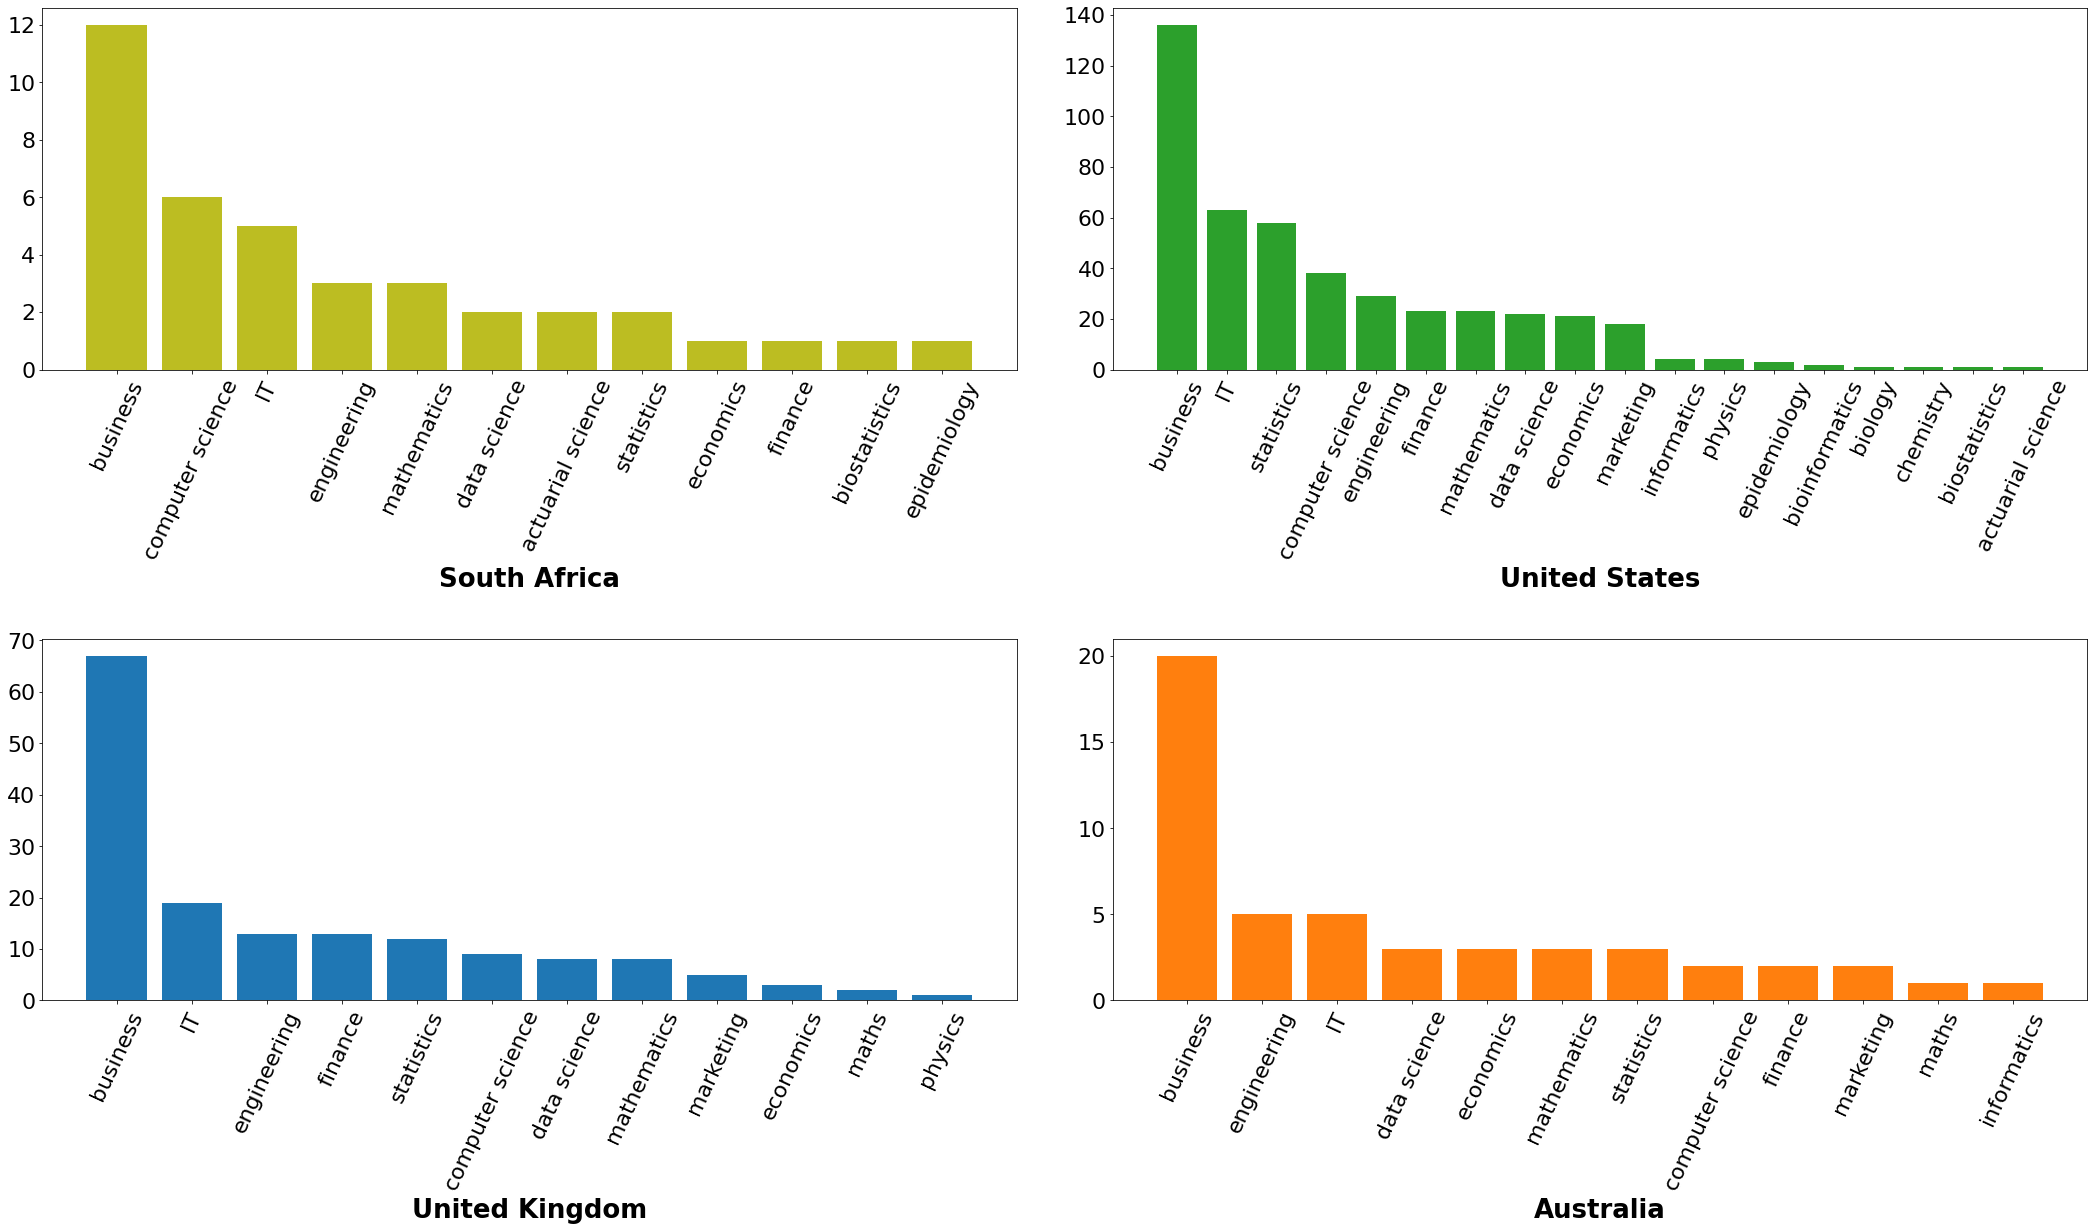

In [16]:
plotRoleDegreeMajors("analyst")

In [17]:
def plotRoleDegreeLevels(role):
    """
    Plots a 1 x 4 subplot showing degree levels for a given role.
    Args: takes df's for a given role (data analyst, scientist or engineer) in all 4 countries
    """
    fig, ax = plt.subplots(1, 4)
    to_do_list_A = [sa_DA, us_DA, uk_DA, au_DA]
    to_do_list_S = [sa_DS, us_DS, uk_DS, au_DS]
    to_do_list_E = [sa_DE, us_DE, uk_DE, au_DE]
    list_used = None
    
    if role == "analyst":
        list_used = to_do_list_A
    elif role == "scientist":
        list_used = to_do_list_S
    elif role == "engineer":
        list_used = to_do_list_E
    else: return None

    colors = ["tab:olive", "tab:green", "tab:blue", "tab:orange"]
    titles = ["South Africa", "United States", "United Kingdom", "Australia"]
    item_number = 0
    
    for df in list_used:
        keys, vals = return_dl_k_and_v(df)
        ax[item_number].bar(keys, vals, color = colors[item_number])
        ax[item_number].set_xlabel(titles[item_number], fontsize = 14, fontweight = "bold")
        item_number += 1
        
    fig.autofmt_xdate(rotation= 45)
    fig.set_figheight(6)
    fig.set_figwidth(10)
    fig;

### i. Data Analyst

#### Degrees:

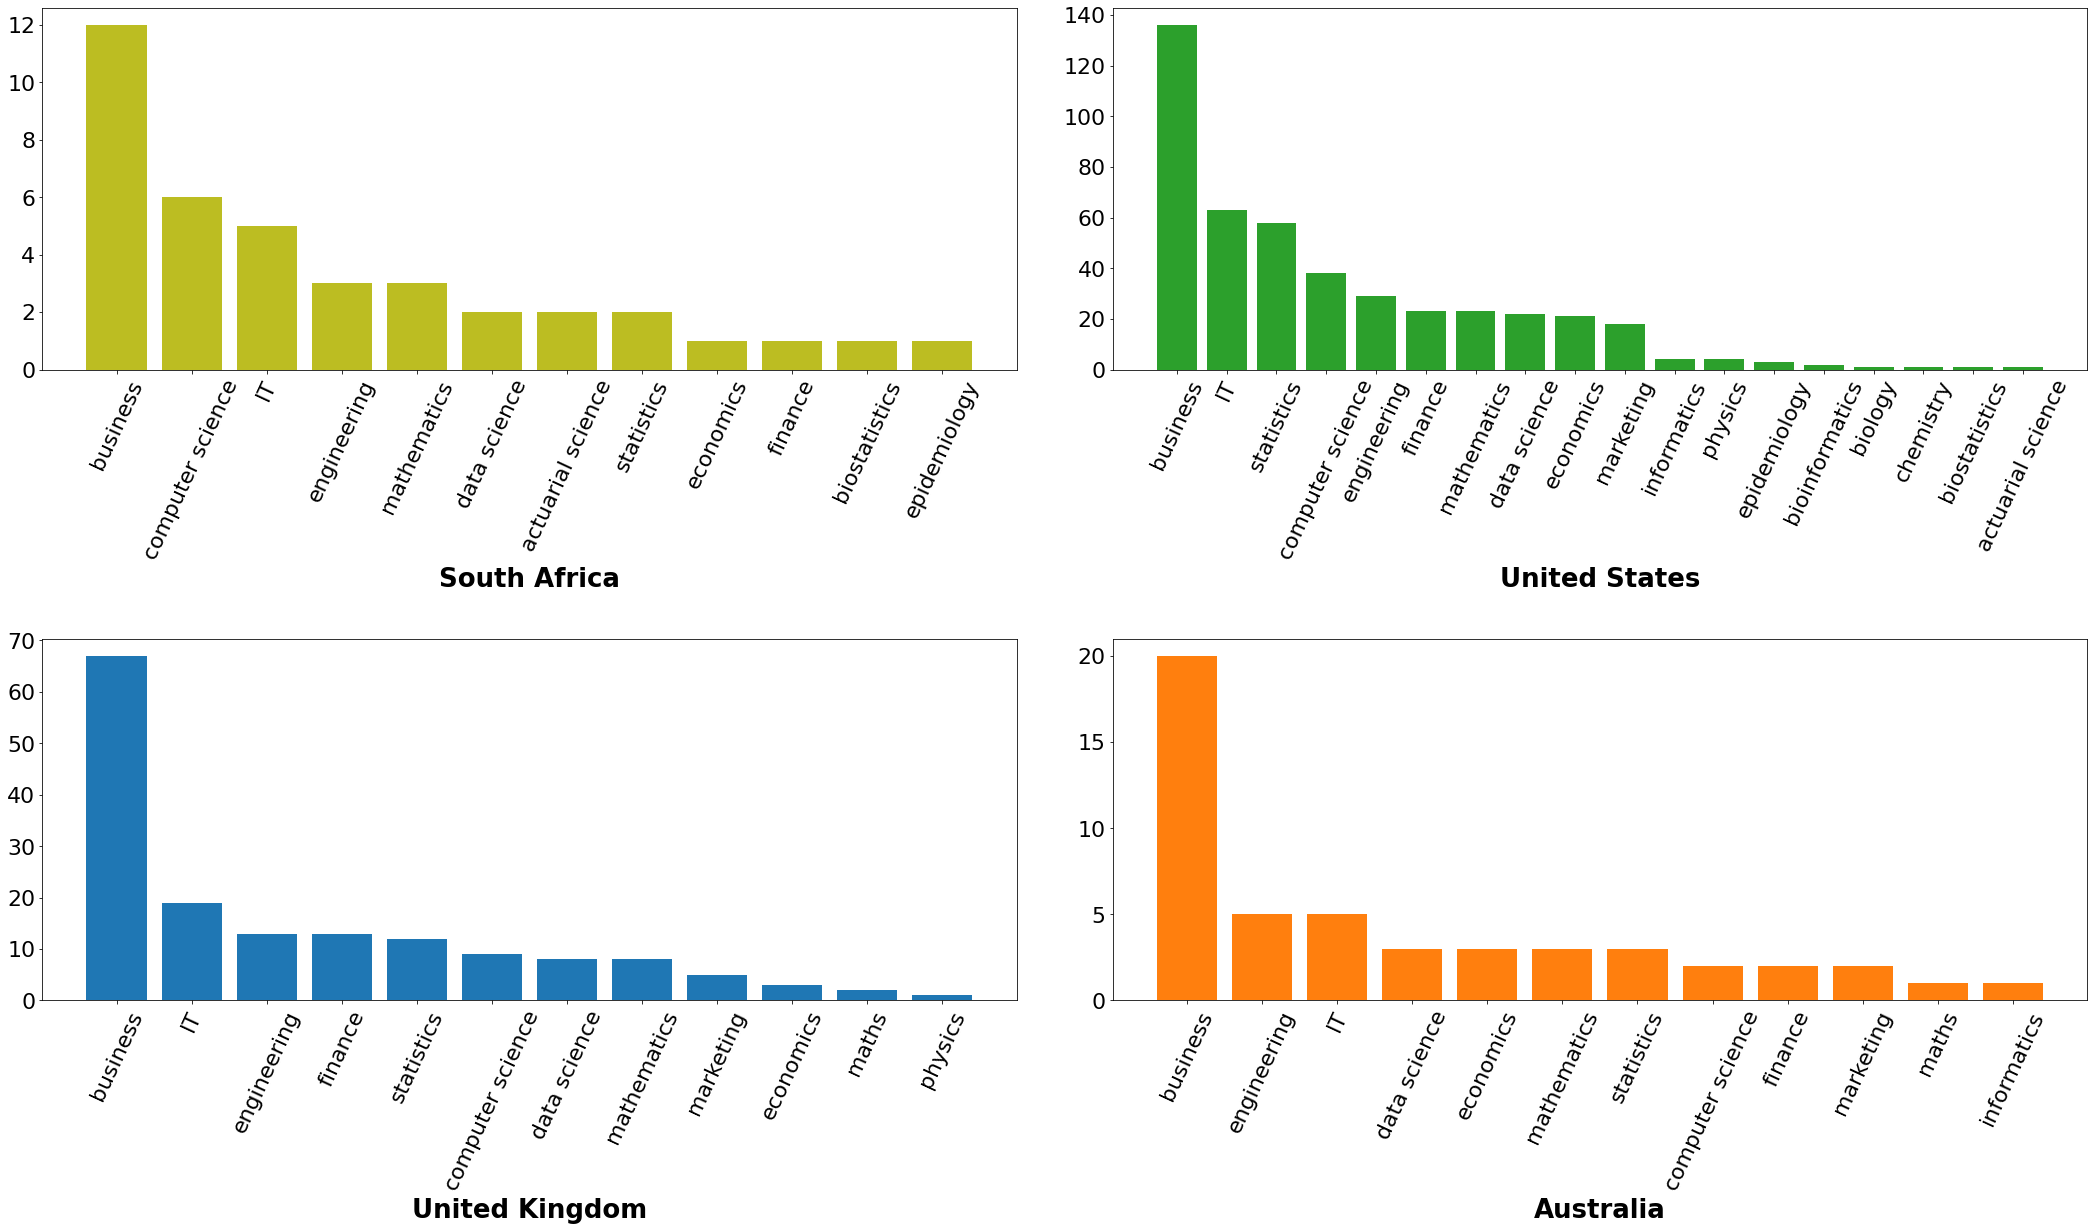

In [18]:
plotRoleDegreeMajors("analyst")

As seen above, data analyst positions commonly require a **business** related degree. Other notable types include **engineering, computer science, IT, mathematics, statistics, and data science** degrees.

#### Degree Levels:

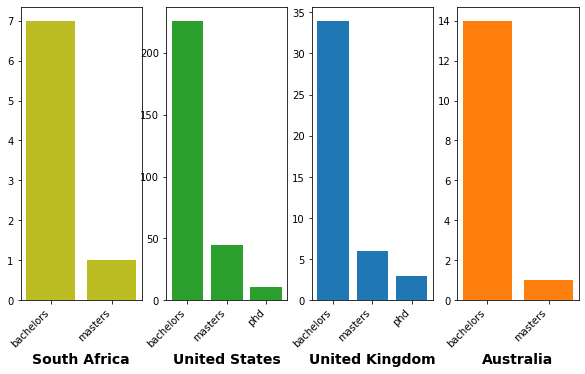

In [19]:
plotRoleDegreeLevels("analyst")

**Bacehlors degrees are most common** and masters degrees and PHD's are clearly not required. Masters degrees are however listed most in the United States.

#### Tools & Technologies:

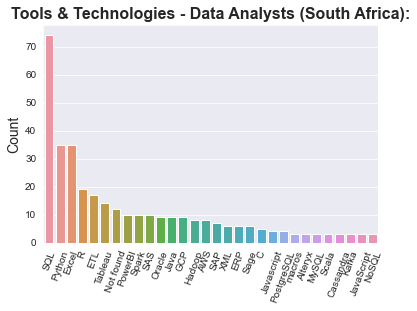

In [20]:
# remove "Not found"
plotTechCount(sa_DA)
plt.title("Tools & Technologies - Data Analysts (South Africa):", size=16, weight = "bold");

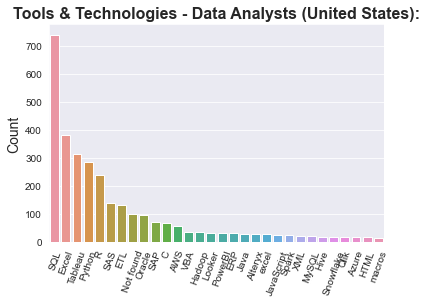

In [21]:
plotTechCount(us_DA)
plt.title("Tools & Technologies - Data Analysts (United States):", size=16, weight = "bold");

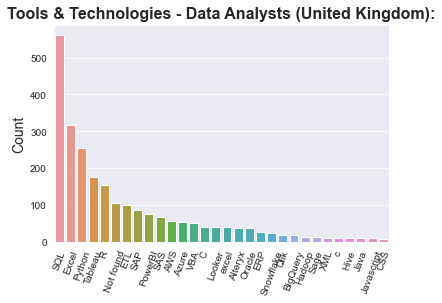

In [22]:
plotTechCount(uk_DA)
plt.title("Tools & Technologies - Data Analysts (United Kingdom):", size=16, weight = "bold");

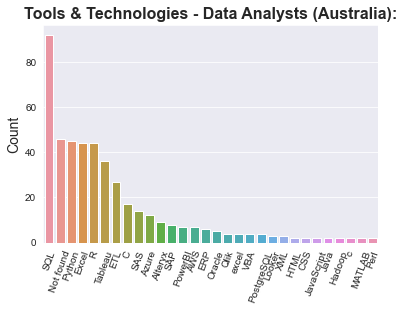

In [23]:
plotTechCount(au_DA)
plt.title("Tools & Technologies - Data Analysts (Australia):", size=16, weight = "bold");

For data analysts, the most in demand skills across all 4 countries are **SQL, R, Python, Excel, Tableau**. Interestingly, Tableau seems to be significanly more favoured than Power BI as a visualisation tool. This is interesting since Power BI desktop is free contains full functionality whereas Tableau desktop is more limited. Perhaps most companies have invested the capital into Tableau software due to its highly regarded visualisation capabilities. ETL tools are also a common requirement. Big data technologies are not in high demand for this role.

### ii. Data Scientist

#### Degrees:

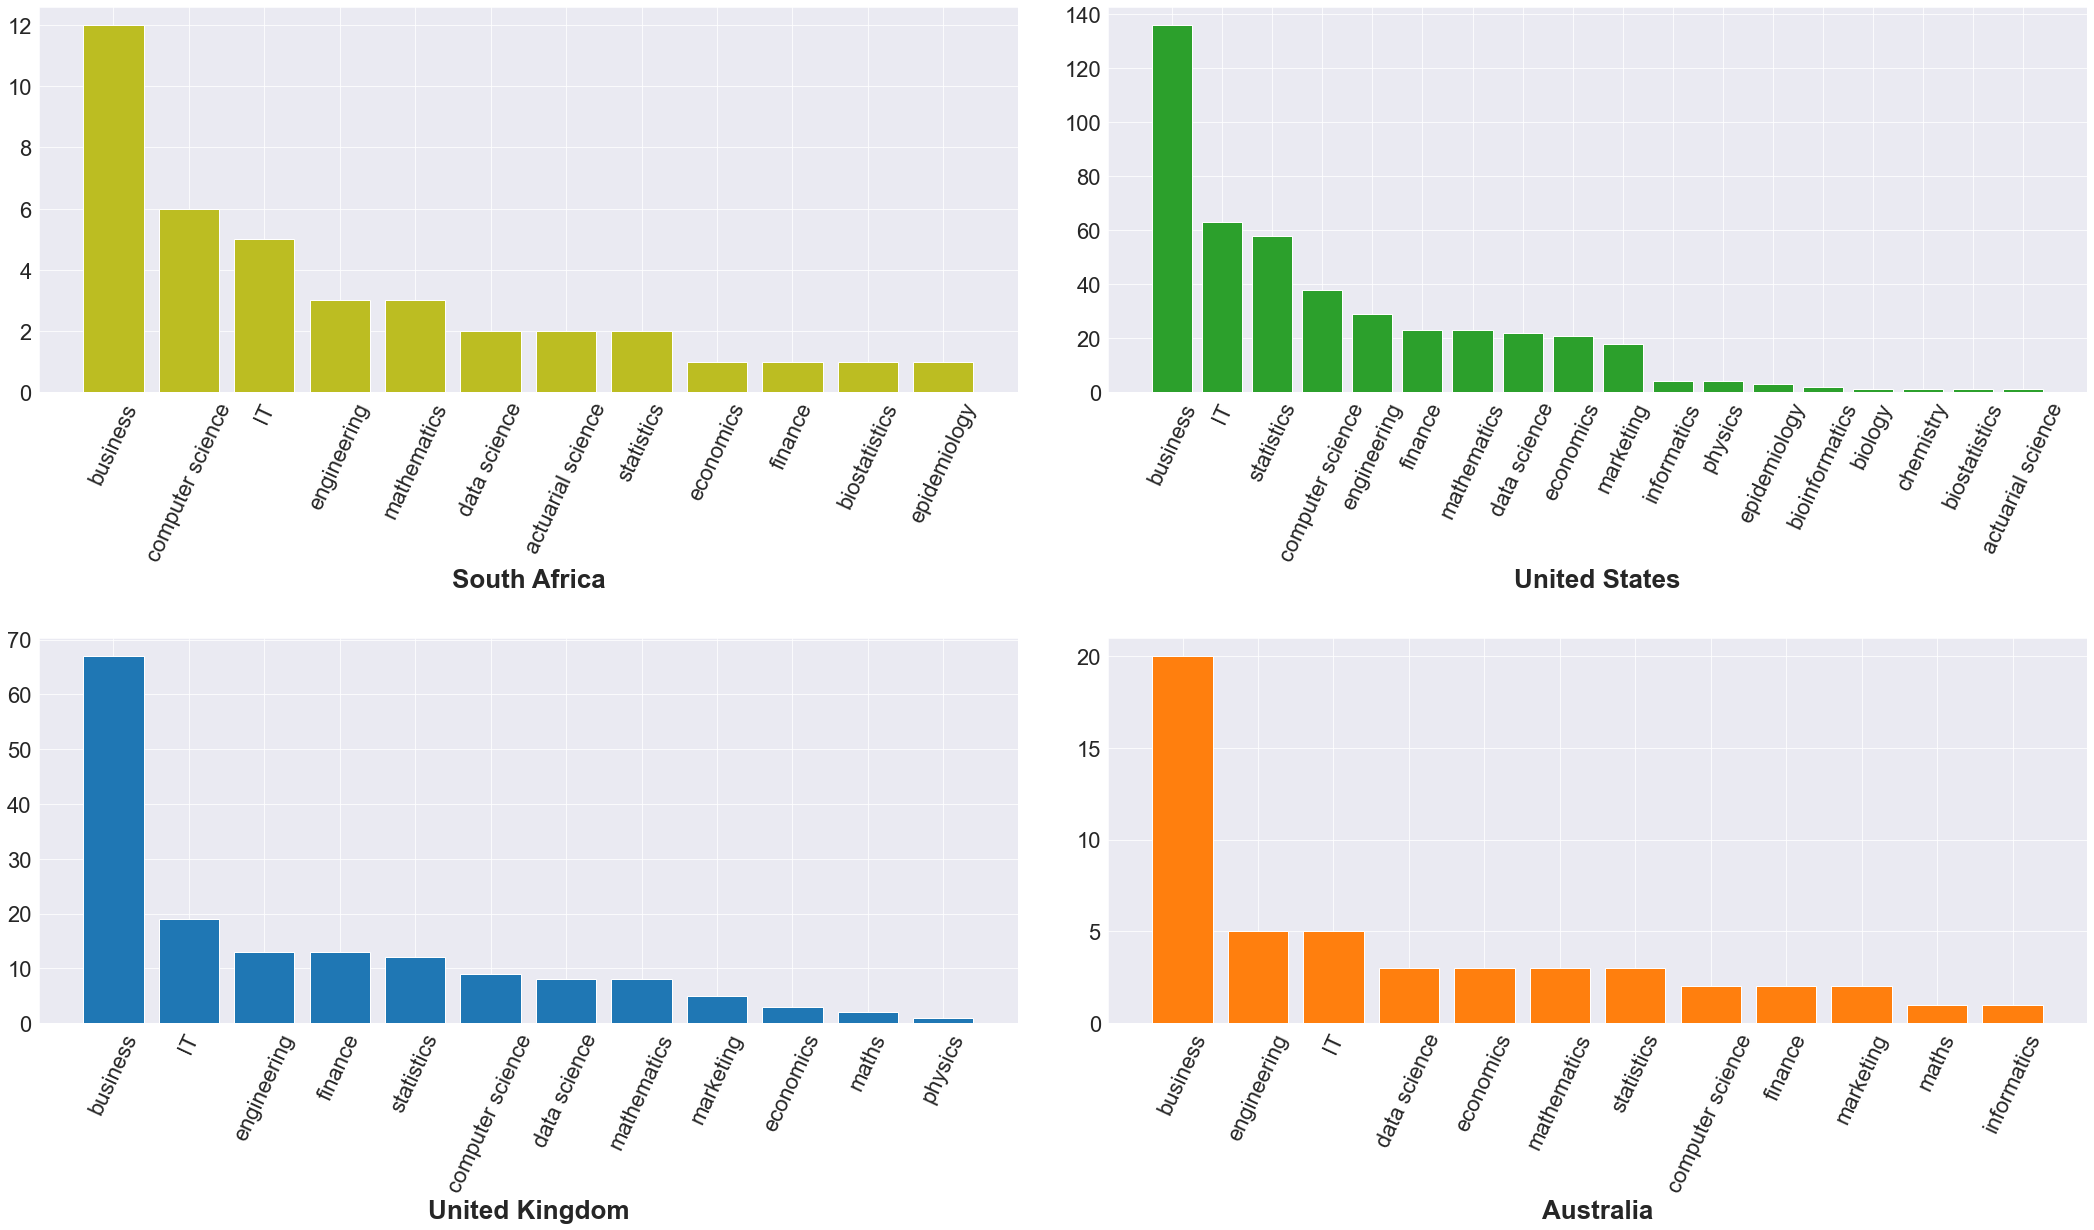

In [24]:
plotRoleDegreeMajors("analyst")

The most common degrees for data scientist roles are **business, data science, statistics, engineering, mathematics, computer science and IT**.

#### Degree Levels:

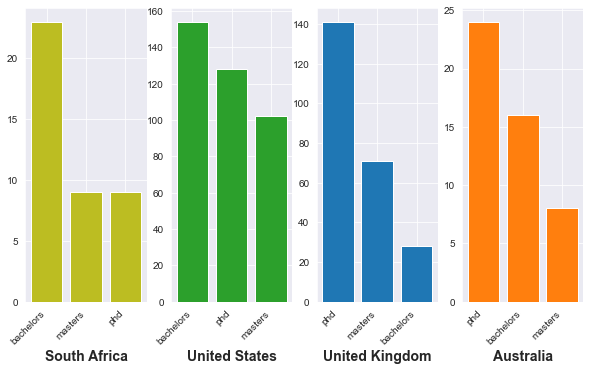

In [25]:
plotRoleDegreeLevels("scientist")

Here it is clear that a **masters or a PHD is advantageous**. A **bachelors** seems like an **entry level requirement**.

#### Tools & Technologies:

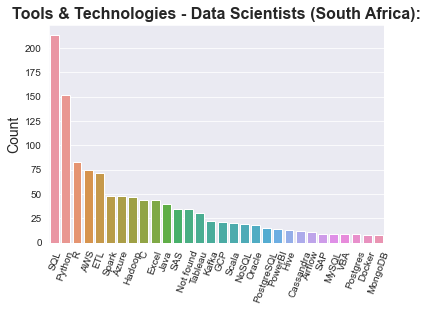

In [26]:
plotTechCount(sa_DS)
plt.title("Tools & Technologies - Data Scientists (South Africa):", size=16, weight = "bold");

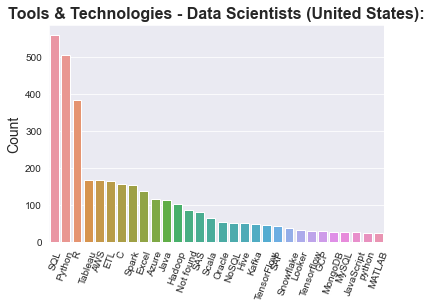

In [27]:
plotTechCount(us_DS)
plt.title("Tools & Technologies - Data Scientists (United States):", size=16, weight = "bold");

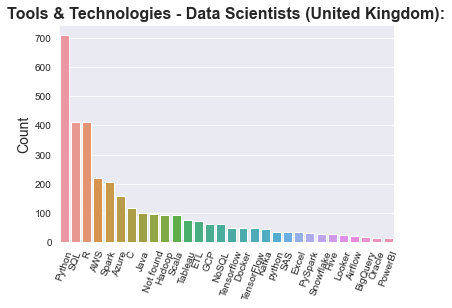

In [28]:
plotTechCount(uk_DS)
plt.title("Tools & Technologies - Data Scientists (United Kingdom):", size=16, weight = "bold");

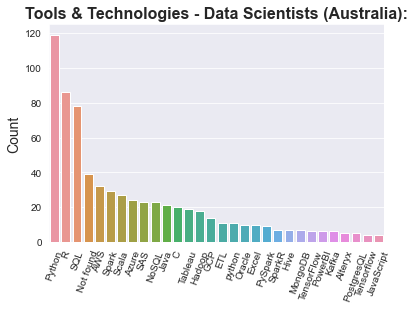

In [29]:
plotTechCount(au_DS)
plt.title("Tools & Technologies - Data Scientists (Australia):", size=16, weight = "bold");

**Python** appears to be favoured over **R** with R coming in second. Perhaps since Python is more of a general purpose programming language. **SQL** is a staple and other important technologies include **AWS, and big data technologies** are also key for data scientist roles across all 4 countries.

### iii. Data Engineer

#### Degrees:

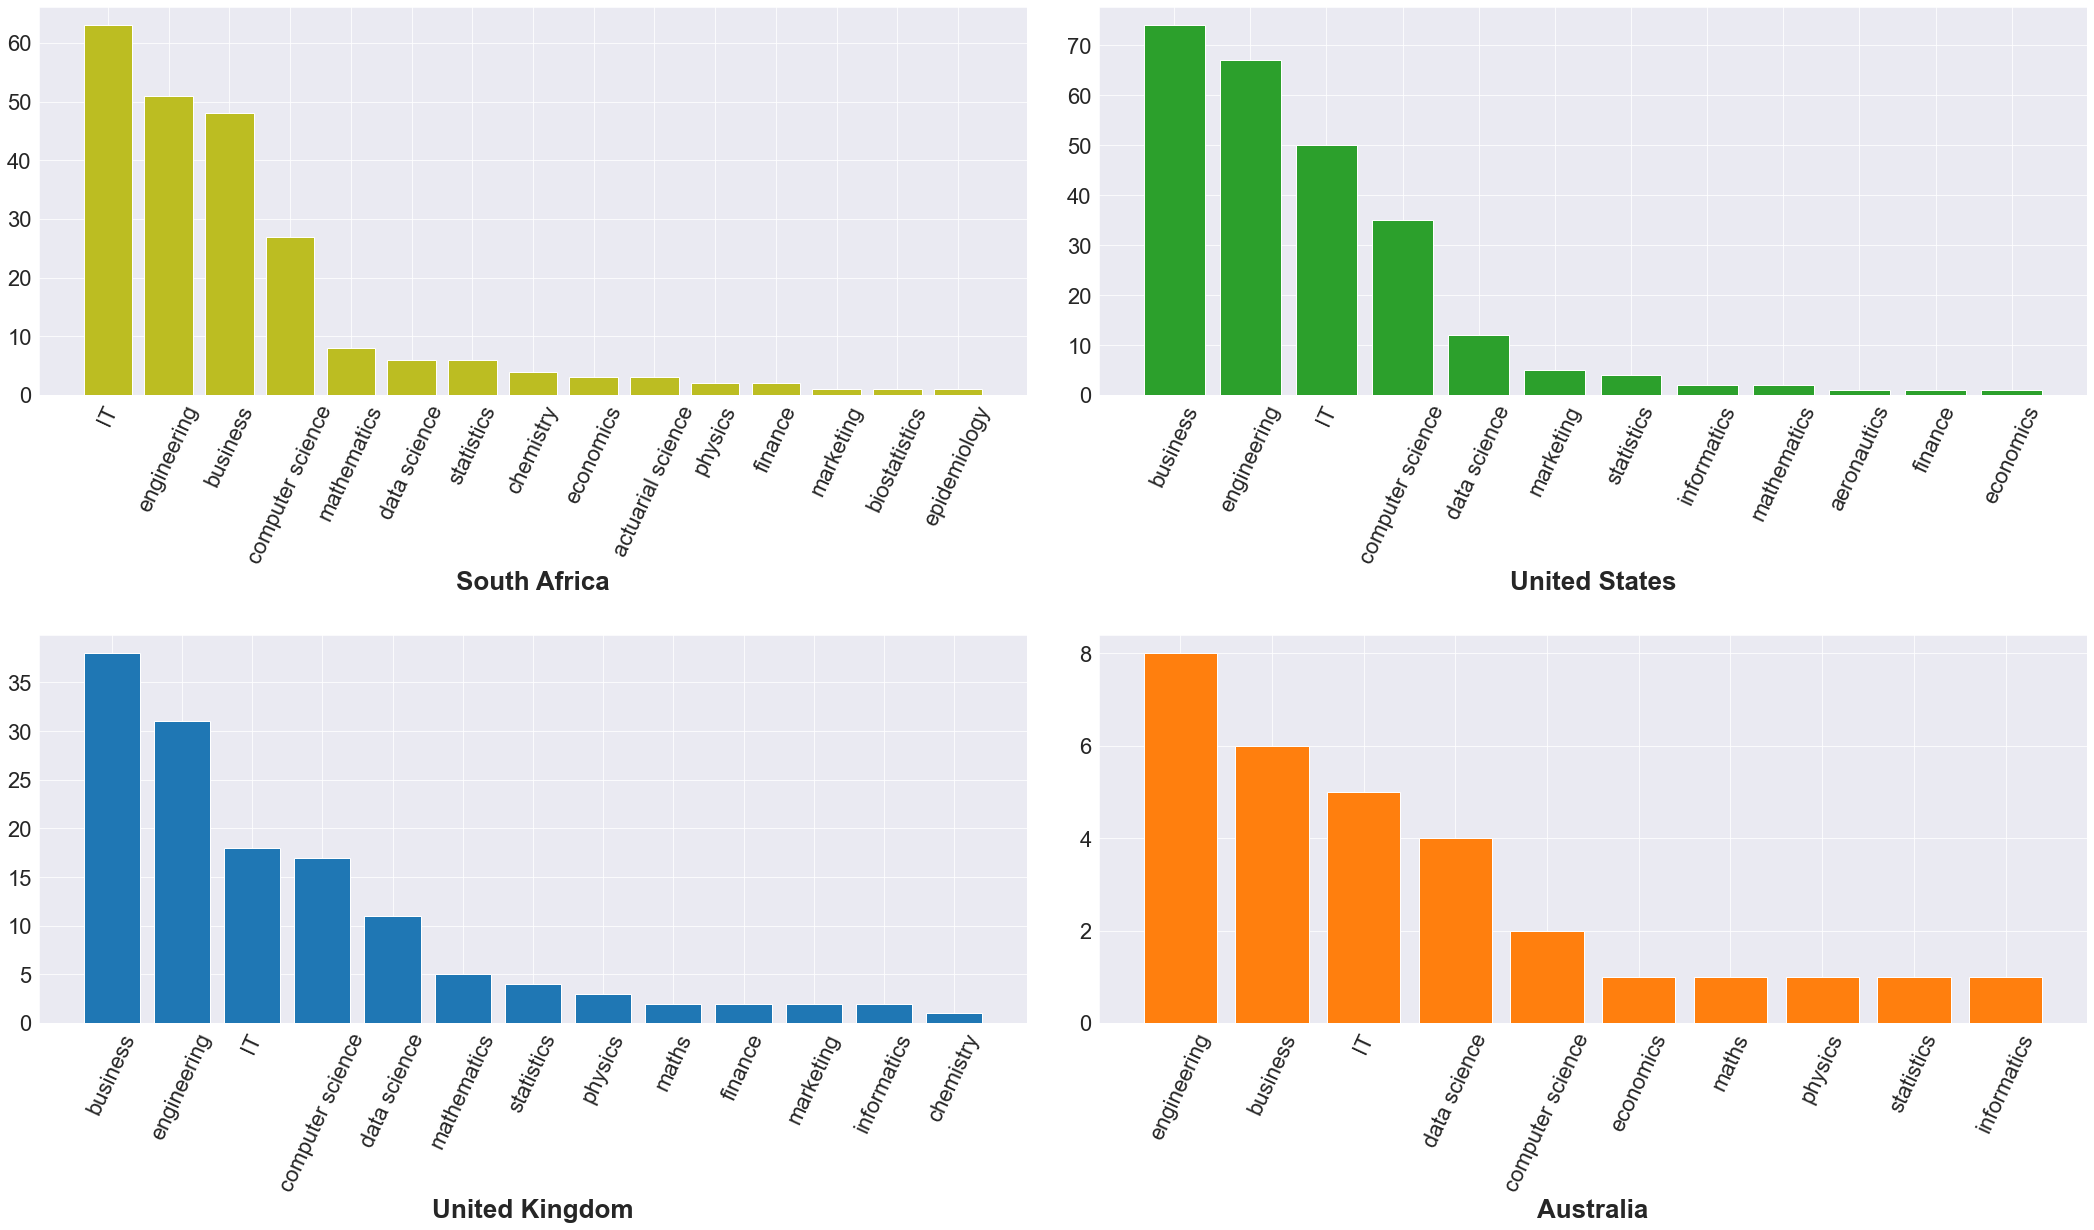

In [30]:
plotRoleDegreeMajors("engineer")

#### Degree Levels:

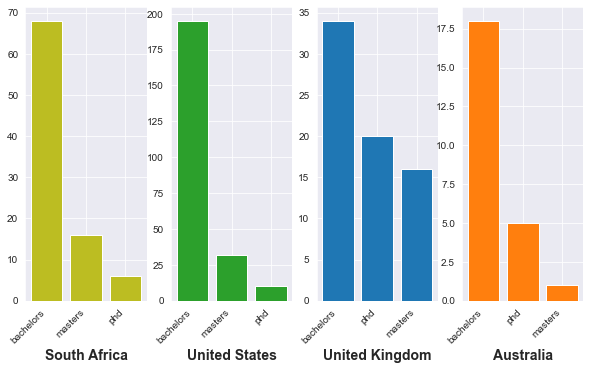

In [31]:
plotRoleDegreeLevels("engineer")

Again, a **bachelor's degree is common**, **master's degrees and PHD's may be advantageous**, but it appears that they are not as advantageous as for data scientist roles.

#### Tools & Technologies:

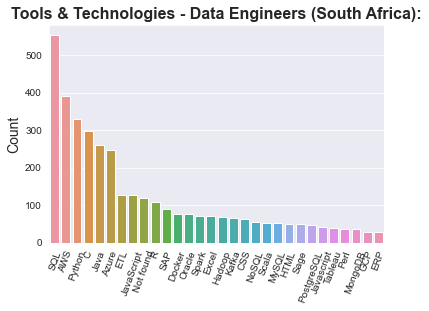

In [32]:
plotTechCount(sa_DE)
plt.title("Tools & Technologies - Data Engineers (South Africa):", size=16, weight = "bold");

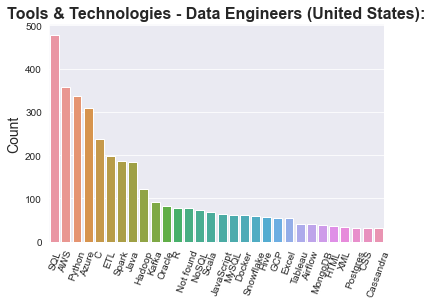

In [33]:
plotTechCount(us_DE)
plt.title("Tools & Technologies - Data Engineers (United States):", size=16, weight = "bold");

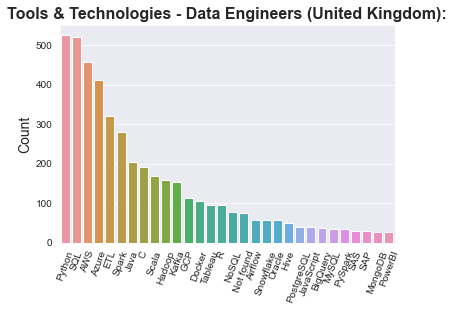

In [34]:
plotTechCount(uk_DE)
plt.title("Tools & Technologies - Data Engineers (United Kingdom):", size=16, weight = "bold");

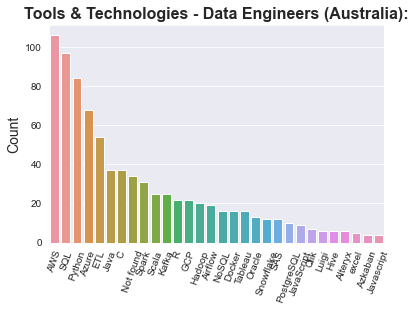

In [35]:
plotTechCount(au_DE)
plt.title("Tools & Technologies - Data Engineers (Australia):", size=16, weight = "bold");

**AWS, SQL, Python (also Java and C), Azure, ETL tools as well as other big data techs** are key for data engineering roles across all 4 countries.

## Part B: Location Insights

In [36]:
def plotJobLocation(df): 
    """
    Plots top 10 job posting locations
    """
    sns.catplot(data = df, x = "Location", kind = "count", 
                order=df["Location"].value_counts().iloc[:10].index).set_xticklabels(rotation=65)
    plt.ylabel("Count", size = 12)

In [37]:
def plotRolesInCountry(country):
    """
    Plots a 1 x 3 subplot showing degree types for a given role.
    
    Args: takes df's for a given role (data analyst, scientist or engineer) in all 4 countries
    """
    fig, ax = plt.subplots(1, 3)
    to_do_list_sa = [sa_DA, sa_DS, sa_DE]
    to_do_list_us = [us_DA, us_DS, us_DE]
    to_do_list_uk = [uk_DA, uk_DS, uk_DE]
    to_do_list_au = [au_DA, au_DS, au_DE]
    list_used = None
    
    if country == "sa":
        list_used = to_do_list_sa
    elif country == "us":
        list_used = to_do_list_us
    elif country == "uk":
        list_used = to_do_list_uk
    elif country == "au":
        list_used = to_do_list_au
    else: return None

    colors = ["firebrick", "tomato", "sandybrown"]
    titles = ["Data Analyst", "Data Scientist", "Data Engineer"]

    title_and_color_number = 0
    item_number = 0
    
    for df in list_used:
        locs_dict = dict(df["Location"].value_counts())
        keys = list(locs_dict.keys())[:10]
        vals = list(locs_dict.values())[:10]
        ax[item_number].bar(keys, vals, color = colors[item_number])
        ax[item_number].set_xlabel(titles[item_number], fontsize = 25, fontweight = "bold")
        ax[item_number].tick_params(axis="x",rotation = 70, labelsize=22)
        ax[item_number].tick_params(axis="y", labelsize=22)
        item_number += 1
        
    fig.set_figheight(10)
    fig.set_figwidth(30)
    fig.tight_layout(pad=4)
    
    fig;

### i. South Africa:

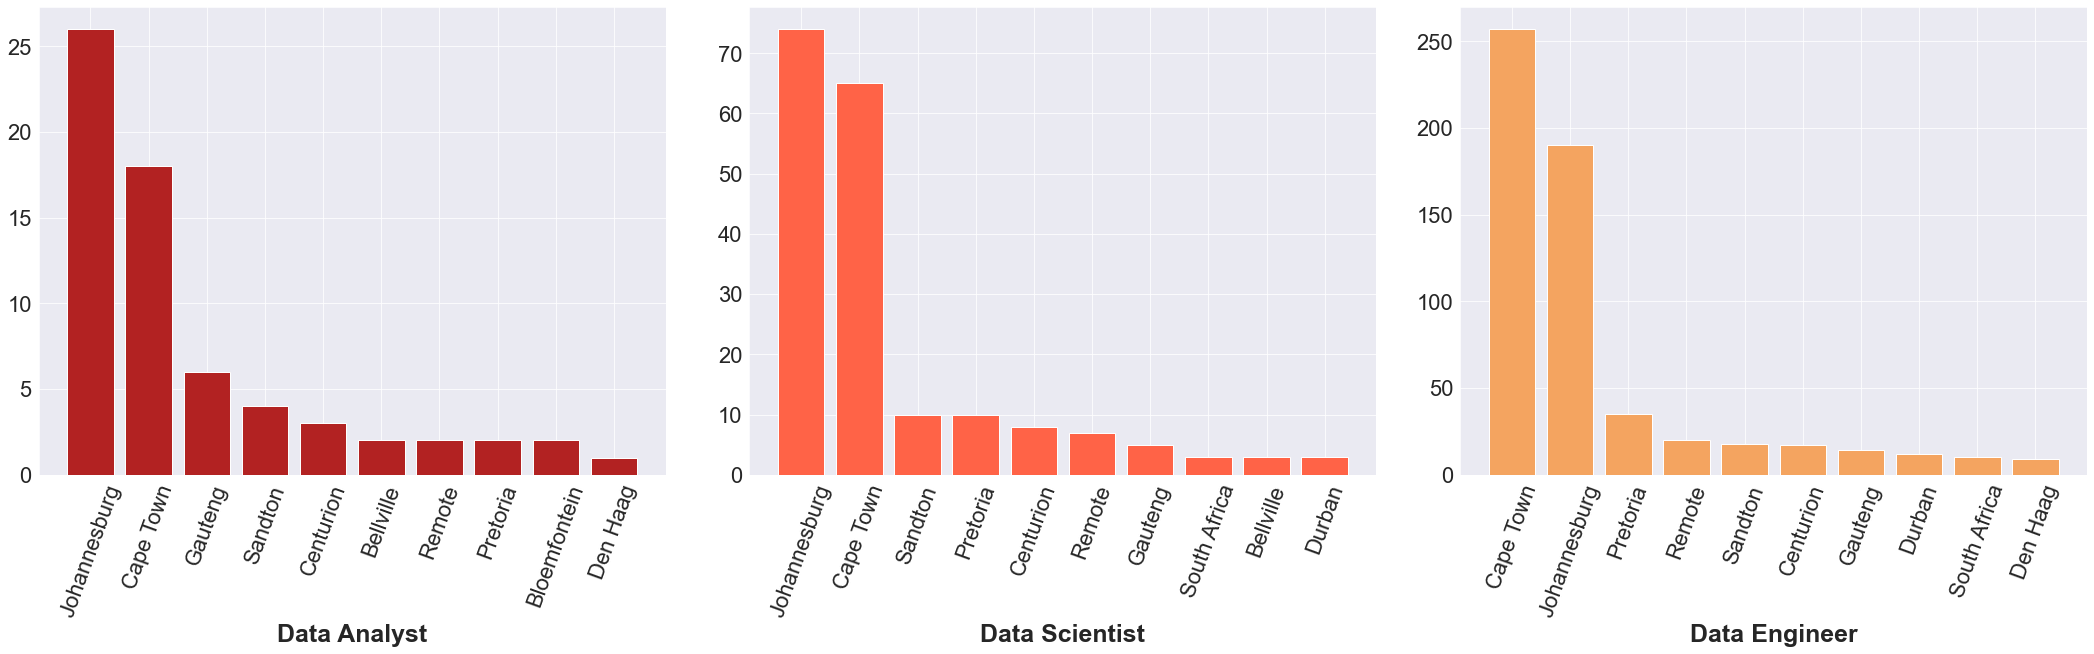

In [38]:
plotRolesInCountry("sa")

For **all 3 roles**, most are found in **Cape Town** and **Johannesburg (Gauteng)**.

### ii. United States

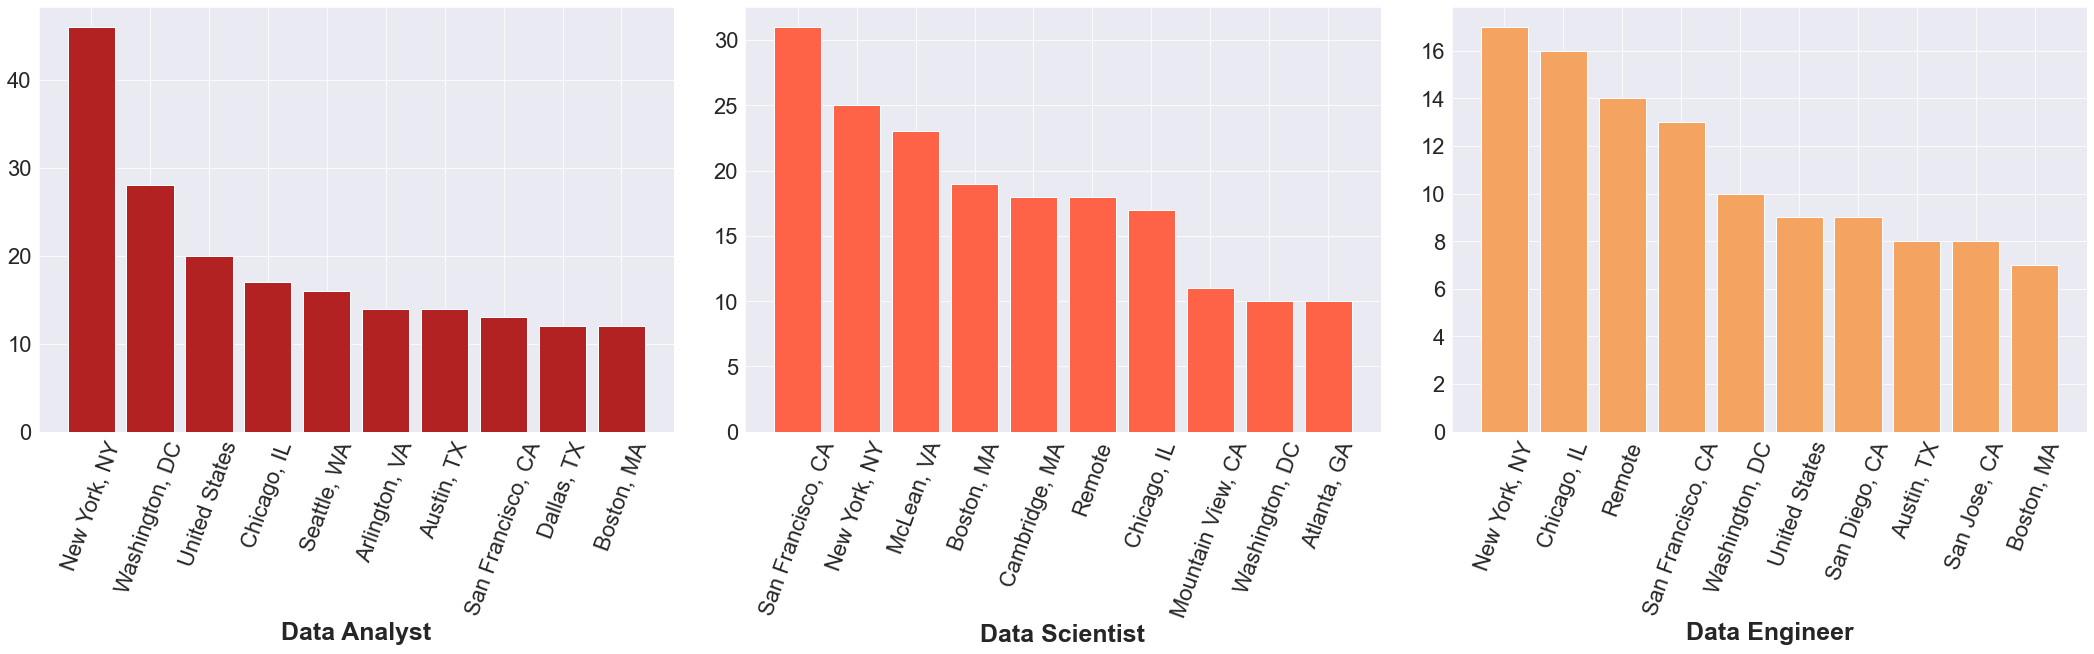

In [39]:
plotRolesInCountry("us")

For **data analyst and data scientist** roles, **New York and Chicago** had the most postings, **New York being significantly higher though**. For **data engineering** roles, New York and Chicago had the most listings but the **differences were relatively insignificant**. Remote jobs are also popular (this is likely inflated due to the data being collected during COVID-19 where the situation necessitated remote work).

### iii. United Kingdom

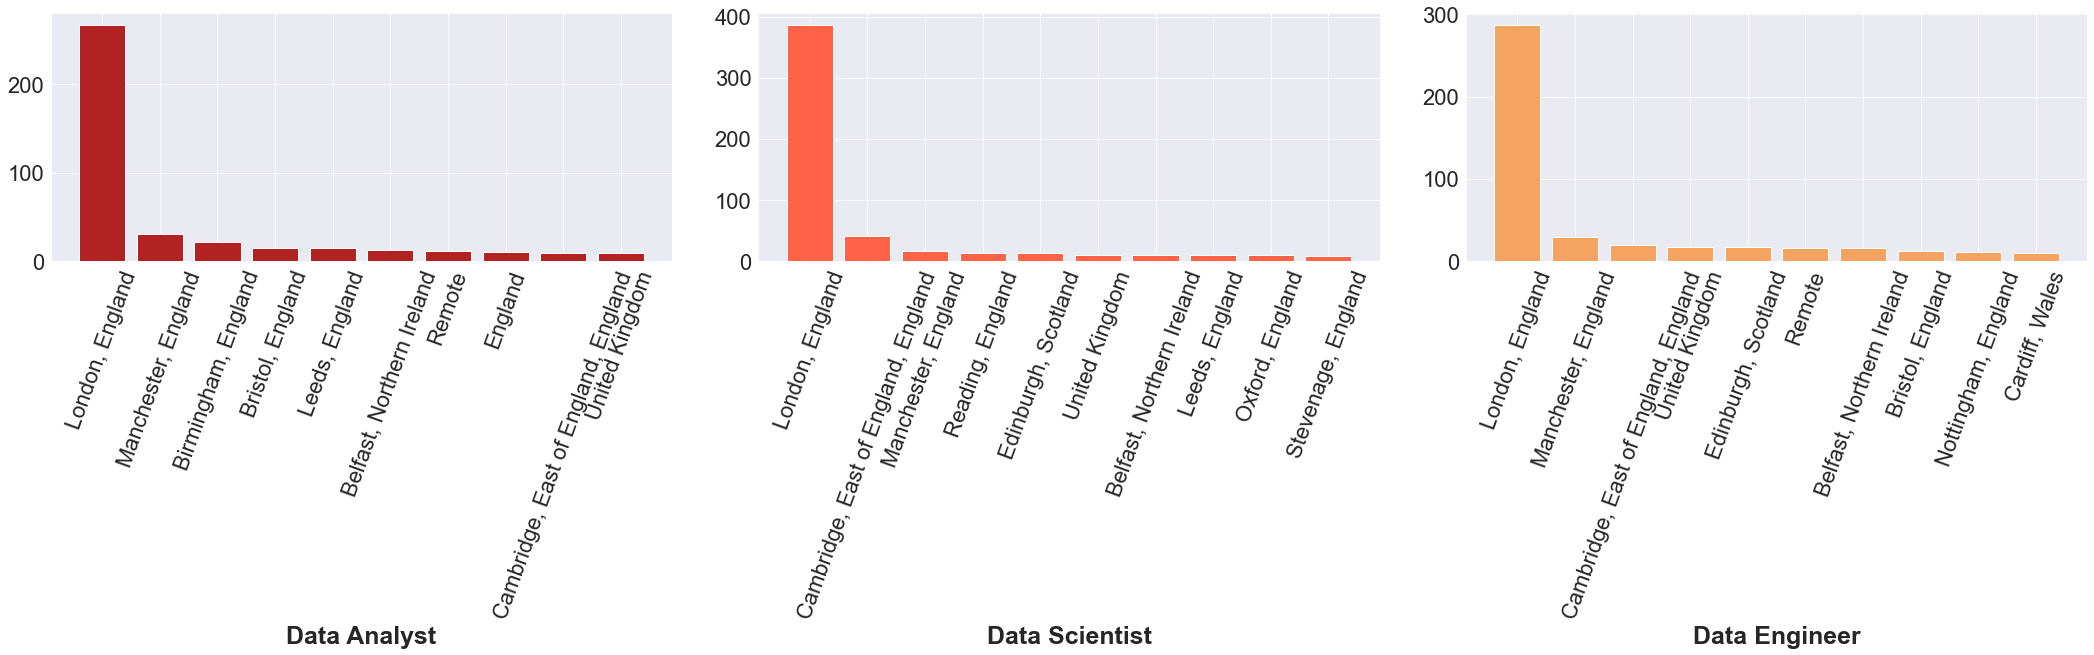

In [40]:
plotRolesInCountry("uk")

**All 3 roles** show that **London has by far the most** listings. This is most likely since it known as one of the largest international 'tech hubs'.

### iv. Australia

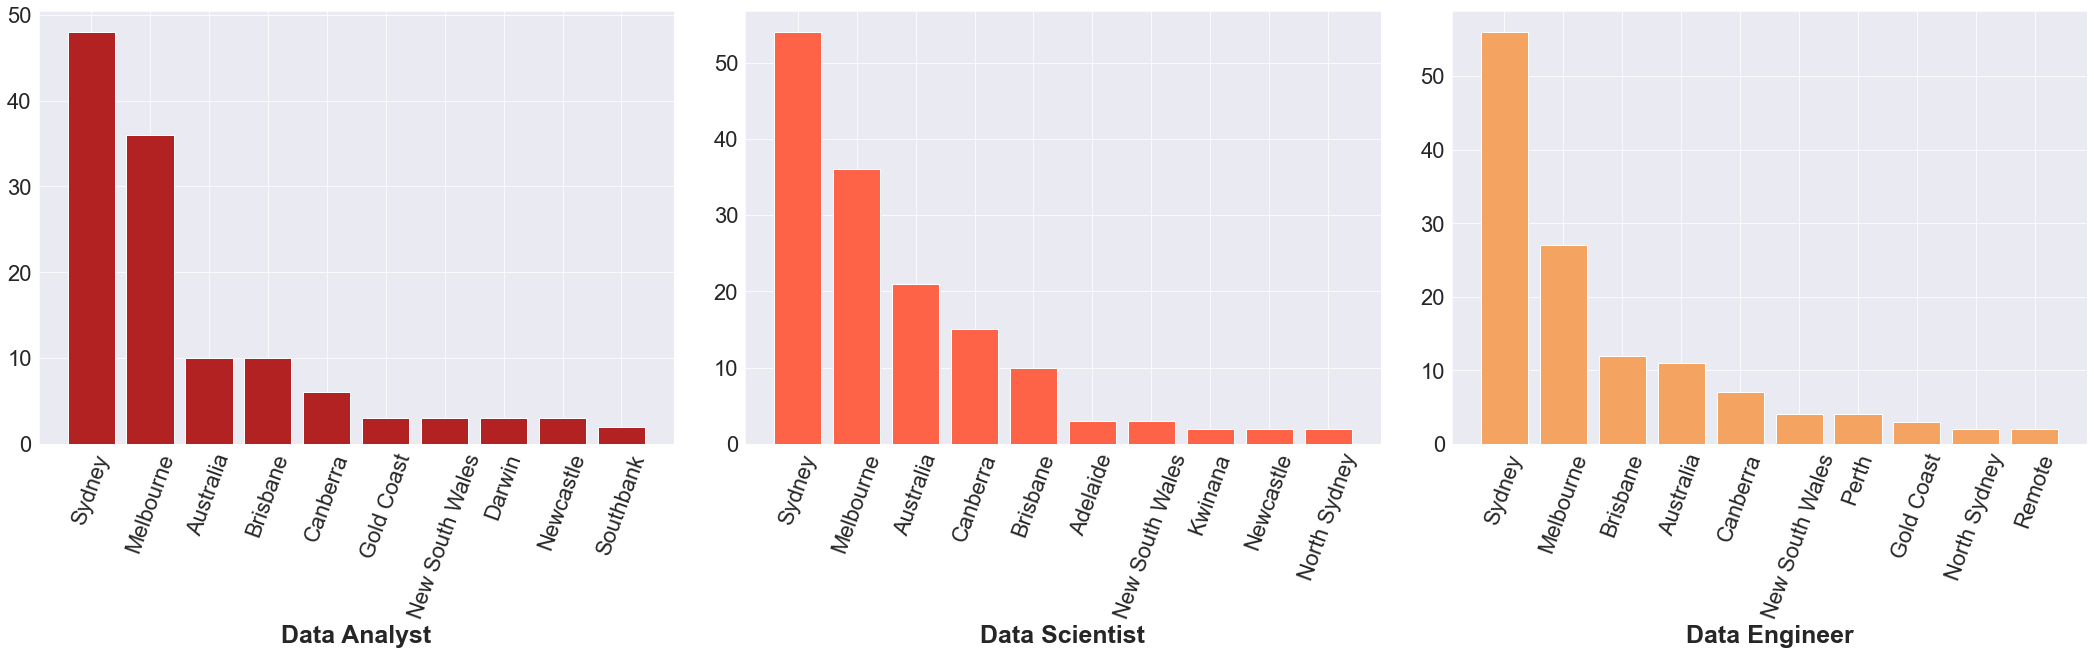

In [41]:
plotRolesInCountry("au")

**All 3 roles** indicate **Sydney and Melbourne** have the most listings. Brisbane is also relatively high for each role.

#### Analysis using NLTK:

In [117]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.collocations import *
nltk.download("punkt")
import string

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [118]:
def cleanJDText(df):
    
    result = list()
    lines = df["Job Description"].values.tolist()
    for text in lines:
        text = text.lower()
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)

        tokens = word_tokenize(text)
        table = str.maketrans("", "", string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
        words = " ".join(words)
        result.append(words)
    
    return result

In [119]:
test2 = cleanJDText(sa_DA)
test2

['whats in it for you this position offers not only the chance to work in a vibrant multicultural and multilingual environment but it is also a great opportunity to fast track your exposure and knowledge of the financial markets data operations what youll work on the data operations analyst supports our shareholder identification sid advisory services within our growing corporate solutions group the sid group is responsible for the reporting and identification of shareholders of major stocklisted companies this role provides exposure to our global client base across the americas europe and asia in this role you will work closely with internal teams to achieve the highest levels of workflow optimization whilst maintaining high data integrity which enhances our analytical products your duties will include the following financial markets data etl data processing optimization recommend and drive initiatives geared to improving data workflow analytics recommend and drive initiatives geared 

In [120]:
bigram = nltk.collocations.BigramAssocMeasures()
trigram = nltk.collocations.TrigramAssocMeasures()
quadgram = nltk.collocations.QuadgramAssocMeasures()

as_str = " ".join([str(i) for i in test2]) 
tokenized = word_tokenize(as_str)

finder = QuadgramCollocationFinder.from_words(tokenized)
finder.apply_freq_filter(3)
finder.nbest(quadgram_measures.pmi, 15)

[('promote', 'reusability', 'maintainability', 'reliability'),
 ('qlickview', 'penthaho', 'mricrostrategy', 'powerbi'),
 ('tableau', 'qlickview', 'penthaho', 'mricrostrategy'),
 ('identifying', 'shortfalls', 'closing', 'gaps'),
 ('unsuccessful', 'comments', 'when', 'applying'),
 ('machine', 'learningdeep', 'learning', 'algorithms'),
 ('models', 'doing', 'deep', 'dives'),
 ('using', 'tableau', 'qlickview', 'penthaho'),
 ('application', 'unsuccessful', 'comments', 'when'),
 ('developing', 'machine', 'learningdeep', 'learning'),
 ('ultimate', 'requirements', 'running', 'workshops'),
 ('learningdeep', 'learning', 'algorithms', 'using'),
 ('etc', 'programming', 'xml', 'javascript'),
 ('job', 'types', 'fulltime', 'permanent'),
 ('gauteng', 'south', 'africa', 'introduction')]